# SUPPORTER DEMOCRACY ANALYSIS

## Fetching Essential Data

In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import itertools

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings('ignore')

In [45]:
# please change those paths depending on your configurations
candidates = pd.read_csv("C:/Users/niluf/OneDrive/Desktop/ETH/Semester 4/Thesis/Data/candidates.csv")
candidates = candidates.loc[candidates['elected'] == 1]

voting_data = pd.read_excel("C:/Users/niluf/OneDrive/Desktop/ETH/Semester 4/Thesis/Data/State People.xlsx")
voting_data = voting_data.drop(columns=['Member of', 'Smart Map X', 'Smart Map Y'])
voting_data.columns = ['vote_' + str(col) for col in voting_data.columns]
voting_data = voting_data.rename(columns={'vote_Name': 'full_name'})

for col in ['vote_22.476', 'vote_22.486', 'vote_23.420', 'vote_22.4447', 'vote_22.466', 'vote_22.469', 'vote_22.472',
            'vote_22.2011', 'vote_21.474', 'vote_21.521', 'vote_21.531', 'vote_22.043', 'vote_22.3606']:
    voting_data[col] = voting_data[col].map({'Yes':'No', 'No':'Yes'})

required_columns = ['full_name', 'age', 'marital_status', 'highest_education', 'answer_32214', 'answer_32215', 'answer_32216', 'answer_32217', 
                    'answer_32218', 'answer_32219', 'answer_32220', 'answer_32221', 'answer_32222', 'answer_32223', 'answer_32224', 'answer_32225',
                    'answer_32226', 'answer_32227', 'answer_32228', 'answer_32229', 'answer_32230', 'answer_32231', 'answer_32232', 'answer_32233',
                    'answer_32234', 'answer_32235', 'answer_32236', 'answer_32237', 'answer_32238', 'answer_32239', 'answer_32240', 'answer_32241',
                    'answer_32242', 'answer_32243', 'answer_32244', 'answer_32245', 'answer_32246', 'answer_32247', 'answer_32248', 'answer_32249',
                    'answer_32250', 'answer_32251', 'answer_32252', 'answer_32253', 'answer_32254', 'answer_32255', 'answer_32256', 'answer_32257',
                    'answer_32258', 'answer_32259', 'answer_32260', 'answer_32261', 'answer_32262', 'answer_32263', 'answer_32264', 'answer_32265',
                    'answer_32266', 'answer_32267', 'answer_32268', 'answer_32269', 'answer_32270', 'answer_32271', 'answer_32272', 'answer_32273', 
                    'answer_32274', 'answer_32275', 'answer_32276', 'answer_32277', 'answer_32278', 'answer_32279', 'answer_32280', 'answer_32281',
                    'answer_32282', 'answer_32283', 'answer_32284', 'answer_32285', 'answer_32286', 'answer_32287', 'answer_32288', 'cleavage_1',
                    'cleavage_2', 'cleavage_3', 'cleavage_4', 'cleavage_5', 'cleavage_6', 'cleavage_7', 'cleavage_8', 'smartmap_x', 'smartmap_y',]

final_data = pd.merge(candidates[required_columns], voting_data, on='full_name')

In [20]:
agent_inaccurates = {
'21.531': ['Barbara Schaffner', 'Beat Flach', 'Benjamin Roduit', 'Christian Lohr', 'Christine Bulliard-Marbach', 'Gerhard Pfister', 'Jean-Luc Addor', 'Jürg Grossen', 'Kathrin Bertschy', 'Katja Christ', 'Laurent Wehrli', 'Leo Müller', 'Marc Jost', 'Marie-France Roth Pasquier', 'Markus Ritter', 'Priska Wismer-Felder', 'Sidney Kamerzin', 'Simon Stadler', 'Stefan Müller-Altermatt', 'Vincent Maitre'],
'21.4283': ['Andreas Glarner', 'Barbara Schaffner', 'Beat Flach', 'Céline Weber', 'Christian Wasserfallen', 'Christine Bulliard-Marbach', 'Martin Bäumle', 'Martina Bircher', 'Priska Wismer-Felder', 'Stefanie Heimgartner', 'Vincent Maitre'],
'21.4405': ['Barbara Schaffner', 'Beat Flach', 'Benjamin Roduit', 'Christian Lohr', 'Christine Bulliard-Marbach', 'Corina Gredig', 'Gerhard Pfister', 'Kathrin Bertschy', 'Lorenz Hess', 'Lukas Reimann', 'Marc Jost', 'Marie-France Roth Pasquier', 'Nik Gugger', 'Priska Wismer-Felder'],
'21.4426': [],
'21.4533': [],
'21.4549': [],
'21.4606': ['Alex Farinelli', 'Andri Silberschmidt', 'Anna Giacometti', 'Beat Walti', 'Benjamin Roduit', 'Bruno Walliser', 'Céline Amaudruz', 'Christian Lohr', 'Christian Wasserfallen', 'Christine Bulliard-Marbach', 'Damien Cottier', 'Daniela Schneeberger', 'Diana Gutjahr', 'Franz Grüter', 'Jacques Nicolet', 'Jean-Luc Addor', 'Laurent Wehrli', 'Leo Müller', 'Lorenzo Quadri', 'Maja Riniker', 'Markus Ritter', 'Nicolò Paganini', 'Patricia von Falkenstein', 'Peter Schilliger', 'Philipp Matthias Bregy', 'Philippe Nantermod', 'Piero Marchesi', 'Regine Sauter', 'Sidney Kamerzin', 'Simon Stadler', 'Simone de Montmollin', 'Susanne Vincenz-Stauffacher'],
'21.4660': ['Alex Farinelli', 'Andreas Gafner', 'Andreas Glarner', 'Andri Silberschmidt', 'Anna Giacometti', 'Beat Walti', 'Benjamin "Beni" Fischer', 'Benjamin Giezendanner', 'Bruno Walliser', 'Céline Amaudruz', 'Christian Imark', 'Damien Cottier', 'Daniela Schneeberger','Erich Hess', 'Franz Grüter', 'Gregor Rutz', 'Jacques Nicolet', 'Jean-Luc Addor', 'Lars Guggisberg', 'Lorenz Hess', 'Lukas Reimann', 'Maja Riniker', 'Manuel Strupler', 'Marcel Dettling', 'Michael Graber', 'Mike Egger', 'Monika Rüegger-Hurschler', 'Nik Gugger', 'Patricia von Falkenstein', 'Peter Schilliger', 'Philippe Nantermod', 'Piero Marchesi', 'Pierre-André Page', 'Regine Sauter', 'Sandra Sollberger', 'Stefanie Heimgartner', 'Susanne Vincenz-Stauffacher', 'Thomas Burgherr', 'Thomas de Courten'],
'22.043': ['Benjamin Roduit', 'Christian Lohr', 'Gerhard Pfister', 'Jean-Luc Addor', 'Jon Pult', 'Kathrin Bertschy', 'Katja Christ', 'Laurent Wehrli', 'Leo Müller', 'Lorenz Hess', 'Marc Jost', 'Marie-France Roth Pasquier', 'Markus Ritter', 'Sidney Kamerzin', 'Simon Stadler', 'Simone de Montmollin', 'Stefan Müller-Altermatt', 'Vincent Maitre'],
'22.404': ['Alex Farinelli', 'Céline Amaudruz', 'Christine Bulliard-Marbach', 'Daniela Schneeberger', 'Elisabeth Schneider-Schneiter', 'Gerhard Pfister', 'Hans-Peter Portmann', 'Jean-Luc Addor', 'Laurent Wehrli', 'Maja Riniker', 'Markus Ritter', 'Matthias Samuel Jauslin', 'Peter Schilliger', 'Susanne Vincenz-Stauffacher'],
'22.466': ['Andri Silberschmidt', 'Anna Giacometti', 'Barbara Schaffner', 'Beat Flach', 'Céline Weber', 'Corina Gredig', 'Damien Cottier', 'Elisabeth Schneider-Schneiter', 'Kathrin Bertschy', 'Katja Christ', 'Laurent Wehrli', 'Maja Riniker', 'Marc Jost', 'Marie-France Roth Pasquier', 'Matthias Samuel Jauslin', 'Melanie Mettler', 'Nicolò Paganini', 'Nik Gugger', 'Patricia von Falkenstein', 'Philipp Matthias Bregy', 'Philippe Nantermod', 'Priska Wismer-Felder', 'Regine Sauter', 'Simon Stadler', 'Simone de Montmollin', 'Stefan Müller-Altermatt', 'Susanne Vincenz-Stauffacher', 'Vincent Maitre'],
'22.469': ['Barbara Schaffner', 'Beat Flach', 'Benjamin Roduit', 'Céline Weber', 'Christian Lohr', 'Corina Gredig', 'Elisabeth Schneider-Schneiter', 'Gerhard Pfister', 'Katja Christ', 'Markus Ritter', 'Melanie Mettler', 'Nicolò Paganini', 'Philipp Matthias Bregy', 'Priska Wismer-Felder', 'Simon Stadler', 'Stefan Müller-Altermatt', 'Thomas Rechsteiner'],
'22.472': ['Benjamin Roduit', 'Bruno Walliser', 'Christine Bulliard-Marbach', 'Jacques Nicolet', 'Jean-Luc Addor', 'Jon Pult', 'Laurent Wehrli', 'Marie-France Roth Pasquier', 'Markus Ritter', 'Melanie Mettler', 'Philipp Matthias Bregy', 'Priska Wismer-Felder', 'Sidney Kamerzin', 'Simon Stadler', 'Stefan Müller-Altermatt', 'Vincent Maitre'],
'22.476': ['Alex Farinelli', 'Barbara Schaffner', 'Beat Flach', 'Benjamin Roduit', 'Christian Lohr', 'Christine Bulliard-Marbach', 'Katja Christ', 'Leo Müller', 'Marc Jost', 'Marie-France Roth Pasquier', 'Markus Ritter', 'Melanie Mettler', 'Priska Wismer-Felder', 'Sidney Kamerzin', 'Stefan Müller-Altermatt'], 
'22.486': ['Alex Farinelli', 'Alfred "Fredi" Heer', 'Andreas Gafner', 'Andri Silberschmidt', 'Anna Giacometti', 'Barbara Steinemann', 'Beat Walti', 'Benjamin "Beni" Fischer', 'Benjamin Giezendanner', 'Benjamin Roduit', 'Bruno Walliser', 'Céline Weber', 'Christian Lohr', 'Christian Wasserfallen', 'Christine Bulliard-Marbach', 'Damien Cottier', 'Daniela Schneeberger', 'Diana Gutjahr', 'Elisabeth Schneider-Schneiter', 'Laurent Wehrli', 'Lorenz Hess',  'Marie-France Roth Pasquier', 'Priska Wismer-Felder', 'Susanne Vincenz-Stauffacher'],
'22.3055': ['Anna Giacometti', 'Céline Weber', 'Corina Gredig', 'Jürg Grossen', 'Katja Christ', 'Marie-France Roth Pasquier', 'Martin Bäumle', 'Simon Stadler'],
'22.3202': ['Alex Farinelli', 'Andri Silberschmidt', 'Anna Giacometti', 'Barbara Schaffner', 'Beat Flach', 'Beat Walti', 'Benjamin Roduit', 'Céline Weber',  'Christian Lohr', 'Christian Wasserfallen', 'Corina Gredig', 'Damien Cottier', 'Daniela Schneeberger', 'Hans-Peter Portmann', 'Kathrin Bertschy', 'Katja Christ', 'Laurent Wehrli', 'Leo Müller', 'Lorenz Hess', 'Maja Riniker', 'Markus Ritter', 'Martin Bäumle', 'Matthias Samuel Jauslin', 'Nicolò Paganini', 'Patricia von Falkenstein', 'Peter Schilliger', 'Philipp Matthias Bregy', 'Philippe Nantermod', 'Simon Stadler', 'Simone de Montmollin', 'Susanne Vincenz-Stauffacher',  'Thomas "Tommy" Matter', 'Thomas Rechsteiner', 'Vincent Maitre'],
'22.3248': ['Benjamin Roduit', 'Christian Imark', 'Christine Bulliard-Marbach', 'Corina Gredig', 'Gerhard Pfister', 'Jean-Luc Addor', 'Kathrin Bertschy', 'Katja Christ', 'Laurent Wehrli', 'Leo Müller', 'Lorenz Hess', 'Lorenzo Quadri', 'Lukas Reimann', 'Marie-France Roth Pasquier', 'Markus Ritter', 'Melanie Mettler', 'Nicolò Paganini', 'Nik Gugger', 'Priska Wismer-Felder', 'Sidney Kamerzin', 'Simon Stadler', 'Stefan Müller-Altermatt', 'Vincent Maitre'],
'22.3329': ['Andreas Glarner', 'Andri Silberschmidt', 'Beat Walti', 'Christian Wasserfallen', 'Damien Cottier', 'Elisabeth Schneider-Schneiter',  'Lorenz Hess', 'Maja Riniker', 'Marc Jost', 'Marie-France Roth Pasquier', 'Matthias Samuel Jauslin', 'Patricia von Falkenstein', 'Peter Schilliger', 'Philippe Nantermod', 'Regine Sauter', 'Simone de Montmollin', 'Susanne Vincenz-Stauffacher', 'Vincent Maitre'],
'22.3456': ['Alex Farinelli', 'Andri Silberschmidt', 'Anna Giacometti', 'Beat Walti', 'Benjamin Giezendanner', 'Christian Wasserfallen', 'Christine Bulliard-Marbach', 'Damien Cottier', 'Daniela Schneeberger', 'Hans-Peter Portmann', 'Laurent Wehrli', 'Leo Müller', 'Lorenz Hess', 'Maja Riniker', 'Matthias Samuel Jauslin', 'Markus Ritter', 'Nicolò Paganini', 'Patricia von Falkenstein', 'Peter Schilliger', 'Philippe Nantermod', 'Regine Sauter', 'Sidney Kamerzin', 'Simone de Montmollin', 'Susanne Vincenz-Stauffacher', 'Thomas Rechsteiner'],
'22.3577': ['Alex Farinelli', 'Andri Silberschmidt', 'Anna Giacometti', 'Beat Walti', 'Benjamin Roduit', 'Céline Weber', 'Christian Lohr', 'Christian Wasserfallen', 'Christine Bulliard-Marbach', 'Damien Cottier', 'Daniela Schneeberger', 'Hans-Peter Portmann', 'Leo Müller', 'Maja Riniker', 'Markus Ritter', 'Martina Bircher', 'Matthias Samuel Jauslin', 'Patricia von Falkenstein', 'Peter Schilliger', 'Philippe Nantermod', 'Regine Sauter', 'Susanne Vincenz-Stauffacher'],
'22.3606': ['Andri Silberschmidt', 'Anna Giacometti', 'Beat Walti', 'Benjamin Roduit', 'Christine Bulliard-Marbach', 'Damien Cottier', 'Daniela Schneeberger', 'Gerhard Pfister', 'Jacques Nicolet', 'Lorenz Hess', 'Maja Riniker', 'Markus Ritter', 'Martin Bäumle', 'Martina Bircher', 'Matthias Samuel Jauslin', 'Patricia von Falkenstein', 'Peter Schilliger', 'Priska Wismer-Felder', 'Regine Sauter', 'Susanne Vincenz-Stauffacher', 'Vincent Maitre'],
'22.3610': ['Alex Farinelli', 'Andri Silberschmidt', 'Anna Giacometti', 'Beat Walti', 'Hans-Peter Portmann', 'Lorenz Hess', 'Martin Bäumle', 'Martina Bircher', 'Matthias Samuel Jauslin', 'Patricia von Falkenstein', 'Regine Sauter'],
'22.3793': ['Barbara Schaffner', 'Beat Flach', 'Elisabeth Schneider-Schneiter', 'Jean-Luc Addor', 'Kathrin Bertschy', 'Katja Christ', 'Laurent Wehrli', 'Nicolò Paganini', 'Philipp Matthias Bregy', 'Pierre-André Page', 'Thomas Rechsteiner'],
'22.3870': ['Alex Farinelli', 'Andreas Gafner', 'Andri Silberschmidt', 'Bruno Walliser', 'Céline Amaudruz', 'Damien Cottier', 'Jean-Luc Addor', 'Jon Pult', 'Jürg Grossen', 'Katja Christ', 'Laurent Wehrli', 'Leo Müller', 'Markus Ritter', 'Nicolò Paganini', 'Philipp Matthias Bregy', 'Sidney Kamerzin', 'Simon Stadler', 'Simone de Montmollin'],
'22.3872': ['Alex Farinelli', 'Aline Trede', 'Andri Silberschmidt', 'Anna Giacometti', 'Bastien Girod', 'Beat Walti', 'Benjamin Roduit', 'Christian Dandrès', 'Christian Lohr', 'Christian Wasserfallen', 'Christine Badertscher', 'Christophe Clivaz', 'Damien Cottier', 'Daniela Schneeberger', 'Delphine Klopfenstein Broggini', 'Diana Gutjahr', 'Emmanuel Amoos', 'Fabien Fivaz', 'Felix Wettstein', 'Florence Brenzikofer', 'Gerhard Andrey', 'Greta Gysin', 'Hans-Peter Portmann', 'Katharina Prelicz-Huber', 'Laurent Wehrli', 'Leo Müller', 'Léonore Porchet', 'Maja Riniker', 'Manuela Weichelt', 'Marionna Schlatter', 'Markus Ritter', 'Matthias Samuel Jauslin', 'Nicolò Paganini', 'Patricia von Falkenstein', 'Peter Schilliger', 'Philippe Nantermod', 'Regine Sauter', 'Sidney Kamerzin', 'Simone de Montmollin'],
'22.3884': [],
'22.3889': ['Céline Weber', 'Christian Imark', 'Christian Wasserfallen', 'Diana Gutjahr', 'Franz Grüter', 'Hans-Peter Portmann', 'Jacques Nicolet', 'Nadja Umbricht Pieren', 'Nicolò Paganini', 'Peter Schilliger', 'Philipp Matthias Bregy', 'Philippe Nantermod', 'Priska Wismer-Felder', 'Sidney Kamerzin', 'Simon Stadler', 'Simone de Montmollin', 'Stefanie Heimgartner', 'Thomas Burgherr', 'Thomas Hurter', 'Thomas Rechsteiner'],
'22.3931': [],
'22.4208': ['Barbara Schaffner', 'Beat Flach', 'Florence Brenzikofer', 'Jean-Luc Addor', 'Jürg Grossen', 'Katja Christ', 'Laurent Wehrli', 'Lukas Reimann', 'Marc Jost', 'Marie-France Roth Pasquier', 'Markus Ritter', 'Martin Bäumle', 'Simon Stadler', 'Stefan Müller-Altermatt', 'Vincent Maitre'],
'22.4220': [],
'22.4258': [],
'22.4270': ['Aline Trede', 'Andreas Gafner', 'Benjamin Roduit', 'Céline Amaudruz', 'Christian Lohr', 'Christine Bulliard-Marbach', 'Diana Gutjahr', 'Elisabeth Schneider-Schneiter', 'Gerhard Pfister', 'Hans-Peter Portmann', 'Jacques Nicolet', 'Jean-Luc Addor', 'Leo Müller', 'Lorenz Hess', 'Marie-France Roth Pasquier', 'Markus Ritter', 'Michael Graber', 'Nicolò Paganini', 'Nik Gugger', 'Peter Schilliger', 'Philipp Matthias Bregy', 'Pierre-Alain Fridez', 'Pierre-André Page', 'Priska Wismer-Felder', 'Sidney Kamerzin', 'Simon Stadler', 'Thomas "Tommy" Matter', 'Valérie Piller Carrard'],
'22.4275': ['Christian Lohr', 'Christine Bulliard-Marbach', 'Gerhard Pfister', 'Hans-Peter Portmann', 'Markus Ritter', 'Matthias Samuel Jauslin', 'Philipp Matthias Bregy', 'Sidney Kamerzin', 'Simon Stadler', 'Thomas Rechsteiner'],
'22.4447': ['Alex Farinelli', 'Andreas Glarner', 'Barbara Schaffner', 'Barbara Steinemann', 'Beat Flach', 'Beat Walti', 'Bruno Walliser', 'Céline Weber', 'Christian Imark', 'Corina Gredig', 'Damien Cottier', 'Diana Gutjahr', 'Franz Grüter', 'Gregor Rutz', 'Hans-Peter Portmann', 'Jacques Nicolet', 'Jean-Luc Addor', 'Jürg Grossen', 'Kathrin Bertschy', 'Lars Guggisberg', 'Laurent Wehrli', 'Lorenzo Quadri', 'Maja Riniker', 'Markus Ritter', 'Martin Bäumle', 'Matthias Samuel Jauslin', 'Mauro Tuena', 'Melanie Mettler', 'Michael Graber', 'Nicolò Paganini', 'Patricia von Falkenstein', 'Peter Schilliger', 'Piero Marchesi', 'Sidney Kamerzin', 'Simon Stadler', 'Stefanie Heimgartner', 'Susanne Vincenz-Stauffacher', 'Thomas Rechsteiner'],
'22.4497': ['Alex Farinelli', 'Benjamin Giezendanner', 'Benjamin Roduit', 'Céline Weber', 'Céline Widmer', 'Christian Wasserfallen', 'Corina Gredig', 'Damien Cottier', 'Elisabeth Schneider-Schneiter', 'Eric Nussbaumer', 'Hans-Peter Portmann', 'Laurent Wehrli', 'Leo Müller', 'Lorenz Hess', 'Maja Riniker', 'Marie-France Roth Pasquier', 'Markus Ritter', 'Matthias Samuel Jauslin', 'Nicolas Walder', 'Nicolò Paganini', 'Patricia von Falkenstein', 'Peter Schilliger', 'Philipp Matthias Bregy', 'Philippe Nantermod', 'Raphaël Mahaim', 'Sibel Arslan', 'Sidney Kamerzin', 'Simone de Montmollin', 'Sophie Michaud Gigon', 'Stefan Müller-Altermatt', 'Susanne Vincenz-Stauffacher', 'Thomas Hurter', 'Thomas Rechsteiner', 'Vincent Maitre'],
'23.3017': ['Céline Weber', 'Jean-Luc Addor', 'Jürg Grossen', 'Lorenzo Quadri', 'Marie-France Roth Pasquier', 'Simon Stadler', 'Vincent Maitre'],
'23.3025': [],
'23.3070': ['Benjamin Roduit', 'Céline Amaudruz', 'Céline Weber', 'Christine Bulliard-Marbach', 'Corina Gredig', 'Marie-France Roth Pasquier', 'Markus Ritter', 'Melanie Mettler', 'Nik Gugger', 'Priska Wismer-Felder', 'Stefan Müller-Altermatt', 'Vincent Maitre'],
'23.3101': ['Alex Farinelli', 'Anna Giacometti', 'Barbara Schaffner', 'Beat Flach', 'Benjamin Roduit', 'Céline Weber', 'Christine Bulliard-Marbach', 'Corina Gredig', 'Gerhard Pfister', 'Hans-Peter Portmann', 'Jürg Grossen', 'Katja Christ', 'Laurent Wehrli', 'Lorenz Hess', 'Marie-France Roth Pasquier', 'Martin Bäumle', 'Matthias Samuel Jauslin', 'Melanie Mettler', 'Nicolò Paganini', 'Patricia von Falkenstein', 'Priska Wismer-Felder', 'Simon Stadler', 'Stefan Müller-Altermatt', 'Susanne Vincenz-Stauffacher', 'Thomas Rechsteiner', 'Vincent Maitre'],
'23.3136': [],
'23.3300': ['Alex Farinelli', 'Andreas Gafner', 'Anna Giacometti', 'Barbara Schaffner', 'Beat Flach', 'Benjamin Roduit', 'Bruno Walliser', 'Céline Amaudruz', 'Christian Lohr', 'Christine Bulliard-Marbach', 'Gerhard Pfister', 'Hans-Peter Portmann', 'Jacques Nicolet', 'Jean-Luc Addor', 'Jürg Grossen', 'Katja Christ', 'Lorenz Hess', 'Marie-France Roth Pasquier', 'Priska Wismer-Felder'],
'23.3346': ['Alex Farinelli', 'Anna Giacometti', 'Benjamin Roduit', 'Christine Bulliard-Marbach', 'Vincent Maitre'],
'23.3501': ['Alex Farinelli', 'Andreas Gafner', 'Benjamin Giezendanner', 'Christian Lohr', 'Jean-Luc Addor', 'Lukas Reimann', 'Markus Ritter', 'Matthias Samuel Jauslin', 'Philippe Nantermod', 'Sidney Kamerzin'],
'23.3850': ['Barbara Schaffner', 'Beat Flach', 'Benjamin Roduit', 'Céline Amaudruz', 'Céline Weber', 'Christine Bulliard-Marbach', 'Corina Gredig', 'Damien Cottier', 'Elisabeth Schneider-Schneiter', 'Gerhard Pfister', 'Jean-Luc Addor', 'Jürg Grossen', 'Katja Christ', 'Lorenz Hess', 'Marc Jost', 'Marie-France Roth Pasquier', 'Markus Ritter', 'Melanie Mettler', 'Nik Gugger', 'Priska Wismer-Felder', 'Sidney Kamerzin', 'Simon Stadler', 'Thomas Burgherr', 'Vincent Maitre'],
'23.3969': []
}

laws_in_consideration = ['vote_22.476', 'vote_22.486',
       'vote_22.4447', 'vote_22.4497',
       'vote_23.3101', 'vote_23.3300', 'vote_23.3346', 'vote_23.3501',
       'vote_23.3850', 'vote_22.466', 'vote_22.469', 'vote_22.472',
       'vote_22.3329', 'vote_22.4208',
       'vote_23.3017', 'vote_22.3248', 'vote_21.4283',
       'vote_21.4660',
       'vote_22.3456', 'vote_22.4270', 'vote_22.4275', 'vote_21.531',
       'vote_22.043', 'vote_22.404', 'vote_22.3606', 'vote_22.3610',
       'vote_22.3889', 'vote_21.4606', 'vote_22.3055', 'vote_22.3870',
       'vote_22.3793', 'vote_22.3577', 'vote_22.3202', 'vote_22.3872']

final_data['votes_participated'] = final_data[laws_in_consideration].notnull().sum(axis=1)
summary_agent_inaccurate = final_data.groupby('full_name')['votes_participated'].sum().reset_index()

name_counts = Counter(itertools.chain.from_iterable(agent_inaccurates.values()))

summary_agent_inaccurate['nr_inacc'] = summary_agent_inaccurate['full_name'].map(name_counts)
summary_agent_inaccurate['agent_inaccurate_ratio'] = summary_agent_inaccurate['nr_inacc'] / summary_agent_inaccurate['votes_participated']
final_data = final_data.merge(summary_agent_inaccurate[['full_name', 'agent_inaccurate_ratio']], on='full_name')

In [ ]:
relevances = {
'21.531': [8, 7, 3],
'21.4283': [7, 8],
'21.4405': [4, 3, 2],
'21.4426': [4, 8, 3],
'21.4533': [4, 7],
'21.4549': [4, 3, 2],
'21.4606': [6, 2],
'21.4660': [8, 4],
'22.043': [7, 3],
'22.404': [5, 7, 8],
'22.466': [5, 8, 7],
'22.469': [3, 2],
'22.472': [7, 2, 3],
'22.476': [2, 4, 7],
'22.486': [2, 4, 8],
'22.3055': [4, 2, 3],
'22.3202': [3, 2],
'22.3248': [7, 2, 3],
'22.3329': [5, 8],
'22.3456': [1, 4, 3],
'22.3577': [2, 6, 3],
'22.3606': [2, 3, 6],
'22.3610': [6, 2],
'22.3793': [7, 3],
'22.3870': [2, 7, 4],
'22.3872': [1, 2],
'22.3884': [2, 4, 6],
'22.3889': [2, 4, 7],
'22.3931': [3, 2, 7],
'22.4208': [7, 8, 2],
'22.4220': [8, 4, 3],
'22.4258': [2, 3, 7],
'22.4270': [4, 3, 1],
'22.4275': [6],
'22.4447': [1, 6, 2],
'22.4497': [1, 3, 2],
'23.420': [4, 8],
'23.3017': [7, 8, 3],
'23.3025': [3, 4],
'23.3070': [2, 3, 7],
'23.3101': [6, 3],
'23.3136': [4, 8, 1],
'23.3300': [2],
'23.3346': [5, 2, 6],
'23.3501': [8, 7],
'23.3850': [3, 2, 7],
'23.3969': [4, 1, 8]
}

first_counts = pd.Series([0]*8, index=range(1,9))
second_counts = pd.Series([0]*8, index=range(1,9))
third_counts = pd.Series([0]*8, index=range(1,9))

# Populate counts
for key, value in relevances.items():
    if len(value) > 0:
        first_counts[value[0]] += 1
    if len(value) > 1:
        second_counts[value[1]] += 1
    if len(value) > 2:
        third_counts[value[2]] += 1

meaning_dict = {1: "Open Foreign Pol", 2: "Liberal Economy", 3: "Restrictive Finances", 4: "Law and Order", 5: "Restrictive Immigration", 6: "Environmental Protection", 7: "Welfare State", 8: "Liberal Society"}


To run *KNN with 5* you can use the snippet below. But since it is already run and stored, it is not recommended to be run again.

In [ ]:
for referendum, cleavages in relevances.items():
    prefix = 'cleavage_'
    cleavages = [prefix + str(cleavage) for cleavage in cleavages]

    referendum = 'vote_' + referendum
    recommendation = 'rec_' + referendum
    final_data[recommendation] = 'None'
    needed_columns = ['full_name'] + cleavages + [referendum]
    results_data = final_data[needed_columns]
    results_data[referendum] = results_data[referendum].map(dict({'Yes':1, 'No':0}))

    for idx in range(len(results_data)):
        if pd.isna(results_data.at[idx, referendum]):
            continue
        experimental_data = results_data.copy()
        experimental_data = experimental_data[cleavages + [referendum]]
        train_data, test_data =  experimental_data.drop(idx), experimental_data.iloc[[idx]]
        train_data = train_data[train_data[referendum].notna()]

        X = train_data[cleavages]
        y = train_data[[referendum]]
        X_train, y_train = train_data[cleavages].to_numpy(), train_data[referendum].to_list()
        X_test, y_test = test_data[cleavages].to_numpy(), test_data[referendum].to_list()

        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)

        knn = KNeighborsClassifier(n_neighbors=5)
        knn.fit(X_train, y_train)
        y_pred = knn.predict(X_test)
        final_data.at[idx, recommendation] = y_pred[0]

final_data = final_data.drop(['cleavage_1', 'cleavage_2', 'cleavage_3', 'cleavage_4', 'cleavage_5', 'cleavage_6', 'cleavage_7', 'cleavage_8'], axis=1)
final_data.to_csv('votes_and_recs_knn_5.csv', index=False)

C:\Users\niluf\AppData\Local\Temp\ipykernel_21256\163264447.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  results_data[referendum] = results_data[referendum].map(dict({'Yes':1, 'No':0}))
C:\Users\niluf\miniconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\niluf\

In [32]:
final_data_with_knn = pd.read_csv('votes_and_recs_knn_5.csv')
knn_law_accuracy = {}
for col in final_data_with_knn.columns:
    if col.startswith('vote_') and col not in ['vote_22.3337', 'vote_21.4461', 'vote_21.4549', 'vote_22.4556', 'vote_22.3394']:
        rec_column = 'rec_' + col
        if rec_column in final_data.columns:
            analysis = final_data_with_knn[['full_name', col, rec_column]]
            analysis = analysis[analysis[col].notna()]
            analysis[col] = analysis[col].map(dict({'Yes':'1.0', 'No':'0.0'}))
            knn_law_accuracy[col] = len(analysis.loc[analysis[col] == analysis[rec_column]]) / len(analysis)

In [48]:
knn_inaccurates = {'21.531': ['Melanie Mettler'],
'21.4283': ['Céline Weber', 'Andreas Glarner', 'Nik Gugger', 'Martina Bircher', 'Stefanie Heimgartner', 'Christian Wasserfallen', 'Martin Bäumle'],
'21.4405': [],
'21.4426': ['Andreas Gafner', 'Monika Rüegger-Hurschler', 'Lukas Reimann', 'Christian Wasserfallen', 'Thomas Rechsteiner'],
'21.4461': ['Nik Gugger'],
'21.4533': ['Alex Farinelli', 'Céline Amaudruz', 'Benjamin "Beni" Fischer', 'Vincent Maitre', 'Laurent Wehrli', 'Lorenz Hess', 'Simon Stadler', 'Beat Flach', 'Jean-Luc Addor', 'Nik Gugger', 'Simone de Montmollin', 'Nicolò Paganini', 'Benjamin Roduit', 'Marc Jost', 'Christian Wasserfallen'],
'21.4549': ['Melanie Mettler'],
'21.4606': ['Michael Graber', 'Manuel Strupler', 'Alfred "Fredi" Heer', 'Philippe Nantermod', 'Pierre-André Page', 'Andreas Gafner', 'Diana Gutjahr', 'Lukas Reimann', 'Martina Bircher', 'Franz Grüter', 'Piero Marchesi'],
'21.4660': ['Thomas Hurter', 'Benjamin "Beni" Fischer', 'Vincent Maitre', 'Andreas Gafner', 'Diana Gutjahr', 'Barbara Steinemann', 'Gregor Rutz', 'Lukas Reimann', 'Nadja Umbricht Pieren', 'Lorenzo Quadri', 'Benjamin Roduit', 'Stefanie Heimgartner', 'Christian Wasserfallen', 'Thomas Rechsteiner'],
'22.043': [],
'22.404': ['Céline Amaudruz', 'Philippe Nantermod', 'Elisabeth Schneider-Schneiter', 'Lorenz Hess', 'Simon Stadler', 'Hans-Peter Portmann', 'Nicolò Paganini', 'Marc Jost', 'Damien Cottier'],
'22.466': [],
'22.469': ['Christian Lohr', 'Markus Ritter', 'Vincent Maitre', 'Céline Weber', 'Laurent Wehrli', 'Elisabeth Schneider-Schneiter', 'Sidney Kamerzin', 'Jean-Luc Addor', 'Benjamin Roduit', 'Thomas Rechsteiner'],
'22.472': ['Kathrin Bertschy', 'Nik Gugger', 'Marc Jost'],
'22.476': [], 
'22.486': [],
'22.3055': ['Vincent Maitre', 'Lorenz Hess', 'Simon Stadler', 'Marie-France Roth Pasquier', 'Priska Wismer-Felder', 'Martin Bäumle'],
'22.3202': ['Alex Farinelli', 'Patricia von Falkenstein', 'Benjamin Giezendanner', 'Philippe Nantermod', 'Jacques Nicolet', 'Beat Walti', 'Andri Silberschmidt', 'Gerhard Pfister', 'Mauro Tuena', 'Thomas Burgherr', 'Andreas Gafner', 'Lars Guggisberg', 'Sidney Kamerzin', 'Maja Riniker', 'Andreas Glarner', 'Gregor Rutz', 'Thomas "Tommy" Matter', 'Lukas Reimann', 'Nadja Umbricht Pieren', 'Jean-Luc Addor', 'Anna Giacometti', 'Daniela Schneeberger', 'Simone de Montmollin', 'Mike Egger', 'Hans-Peter Portmann', 'Sandra Sollberger', 'Regine Sauter', 'Benjamin Roduit', 'Cyril Aellen', 'Matthias Samuel Jauslin', 'Franz Grüter', 'Damien Cottier', 'Stefanie Heimgartner', 'Christian Wasserfallen', 'Thomas Rechsteiner', 'Martin Bäumle'],
'22.3248': ['Christian Imark'],
'22.3329': ['Céline Weber', 'Lorenz Hess', 'Andreas Glarner', 'Nik Gugger', 'Marc Jost', 'Martin Bäumle'],
'22.3337': ['Martin Bäumle'],
'22.3394': ['Markus Ritter', 'Elisabeth Schneider-Schneiter', 'Sidney Kamerzin', 'Nicolò Paganini', 'Martin Bäumle'],
'22.3456': ['Christian Lohr', 'Markus Ritter', 'Laurent Wehrli', 'Gerhard Pfister', 'Simon Stadler', 'Leo Müller', 'Priska Wismer-Felder', 'Philipp Matthias Bregy', 'Benjamin Roduit', 'Christine Bulliard-Marbach'],
'22.3577': ['Michael Graber', 'Alex Farinelli', 'Thomas Hurter', 'Alfred "Fredi" Heer', 'Philippe Nantermod', 'Beat Walti', 'Jean-Luc Addor', 'Anna Giacometti', 'Martina Bircher', 'Damien Cottier'],
'22.3606': ['Michael Graber', 'Alex Farinelli', 'Beat Walti', 'Laurent Wehrli', 'Elisabeth Schneider-Schneiter', 'Maja Riniker', 'Anna Giacometti', 'Daniela Schneeberger', 'Damien Cottier'],
'22.3610': ['Alex Farinelli', 'Patricia von Falkenstein', 'Peter Schilliger', 'Beat Walti', 'Andri Silberschmidt', 'Lorenz Hess', 'Anna Giacometti'],
'22.3793': ['Céline Amaudruz', 'Kathrin Bertschy', 'Laurent Wehrli', 'Elisabeth Schneider-Schneiter', 'Beat Flach', 'Jean-Luc Addor', 'Barbara Schaffner', 'Nicolò Paganini', 'Philipp Matthias Bregy', 'Thomas Rechsteiner'],
'22.3870': ['Andreas Gafner', 'Elisabeth Schneider-Schneiter', 'Simone de Montmollin', 'Hans-Peter Portmann', 'Nicolò Paganini'],
'22.3872': ['Elisabeth Schneider-Schneiter', 'Anna Giacometti', 'Philipp Matthias Bregy'],
'22.3884': ['Markus Ritter', 'Vincent Maitre', 'Gerhard Pfister', 'Lorenz Hess', 'Simon Stadler', 'Philipp Matthias Bregy', 'Benjamin Roduit', 'Christine Bulliard-Marbach'],
'22.3889': ['Philippe Nantermod', 'Benjamin "Beni" Fischer', 'Mauro Tuena', 'Thomas Burgherr', 'Andreas Gafner', 'Lars Guggisberg', 'Erich Hess', 'Andreas Glarner', 'Monika Rüegger-Hurschler', 'Gregor Rutz', 'Thomas "Tommy" Matter', 'Nadja Umbricht Pieren', 'Thomas de Courten', 'Benjamin Roduit', 'Marc Jost', 'Stefanie Heimgartner', 'Christian Wasserfallen', 'Thomas Rechsteiner'],
'22.3931': ['Michael Graber', 'Bruno Walliser', 'Brigitte Crottaz', 'Benjamin "Beni" Fischer', 'Jacques Nicolet', 'Christine Badertscher', 'Céline Weber', 'Sophie Michaud Gigon', 'Lars Guggisberg', 'Kilian Baumann', 'Christian Dandrès', 'Laurence Fehlmann Rielle', 'Claudia Friedl', 'Lukas Reimann', 'Felix Wettstein', 'Jean-Luc Addor', 'Nik Gugger', 'Emmanuel Amoos', 'Christophe Clivaz', 'Mike Egger', 'Roger Nordmann', 'Hans-Peter Portmann', 'Bastien Girod', 'Franziska Ryser', 'Marc Jost', 'Jacqueline Badran', 'Stefanie Heimgartner'],
'22.4208': ['Florence Brenzikofer', 'Martin Bäumle'],
'22.4220': ['Céline Weber', 'Nik Gugger', 'Marc Jost', 'Martin Bäumle'],
'22.4258': ['Tamara Funiciello', 'Michael Graber', 'Christian Imark', 'Bruno Walliser', 'Patricia von Falkenstein', 'Peter Schilliger', 'Brigitte Crottaz', 'Benjamin Giezendanner', 'Alfred "Fredi" Heer', 'Benjamin "Beni" Fischer', 'Christine Badertscher', 'Florence Brenzikofer', 'Pierre-André Page', 'Mauro Tuena', 'Greta Gysin', 'Thomas Burgherr', 'Lars Guggisberg', 'Christian Dandrès', 'Elisabeth Schneider-Schneiter', 'Laurence Fehlmann Rielle', 'Erich Hess', 'Andreas Glarner', 'Monika Rüegger-Hurschler', 'Claudia Friedl', 'Thomas "Tommy" Matter', 'Leo Müller', 'Emmanuel Amoos', 'Christophe Clivaz', 'Mike Egger', 'Roger Nordmann', 'Irène Kälin', 'Regine Sauter', 'Bastien Girod', 'Franziska Ryser', 'Matthias Samuel Jauslin', 'Franz Grüter', 'Marionna Schlatter', 'Damien Cottier', 'Stefanie Heimgartner', 'Marcel Dettling', 'Piero Marchesi', 'Thomas Rechsteiner'],
'22.4270': ['Michael Graber', 'Céline Amaudruz', 'Peter Schilliger', 'Vincent Maitre', 'Jacques Nicolet', 'Pierre-André Page', 'Laurent Wehrli', 'Andreas Gafner', 'Elisabeth Schneider-Schneiter', 'Lukas Reimann', 'Jean-Luc Addor', 'Simone de Montmollin', 'Pierre-Alain Fridez', 'Hans-Peter Portmann', 'Thomas Rechsteiner'],
'22.4275': ['Alex Farinelli', 'Patricia von Falkenstein', 'Markus Ritter', 'Vincent Maitre', 'Laurent Wehrli', 'Gerhard Pfister', 'Simon Stadler', 'Anna Giacometti', 'Hans-Peter Portmann', 'Priska Wismer-Felder', 'Philipp Matthias Bregy', 'Matthias Samuel Jauslin', 'Thomas Rechsteiner'],
'22.4447': ['Christian Imark', 'Patricia von Falkenstein', 'Céline Amaudruz', 'Benjamin Giezendanner', 'Alfred "Fredi" Heer', 'Philippe Nantermod', 'Beat Walti', 'Gerhard Pfister', 'Mauro Tuena', 'Thomas Burgherr', 'Andreas Gafner', 'Lars Guggisberg', 'Elisabeth Schneider-Schneiter', 'Sidney Kamerzin', 'Barbara Steinemann', 'Maja Riniker', 'Simon Stadler', 'Andreas Glarner', 'Sandra Sollberger', 'Philipp Matthias Bregy', 'Susanne Vincenz-Stauffacher', 'Damien Cottier', 'Marcel Dettling'],
'22.4497': ['Kathrin Bertschy', 'Stefan Müller-Altermatt', 'Jürg Grossen', 'Corina Gredig', 'Beat Flach', 'Marie-France Roth Pasquier', 'Nik Gugger', 'Marc Jost'],
'23.420': ['Brigitte Crottaz', 'Jürg Grossen', 'Katja Christ', 'Melanie Mettler', 'Corina Gredig', 'Priska Seiler Graf', 'Barbara Schaffner', 'Christophe Clivaz', 'Matthias Aebischer', 'Martin Bäumle'],
'23.3017': ['Christian Lohr', 'Vincent Maitre', 'Céline Weber', 'Stefan Müller-Altermatt', 'Jürg Grossen', 'Simon Stadler', 'Marie-France Roth Pasquier', 'Nik Gugger', 'Lorenzo Quadri', 'Priska Wismer-Felder'],
'23.3025': ['Céline Weber', 'Nik Gugger', 'Marc Jost'],
'23.3070': [],
'23.3101': ['Stefan Müller-Altermatt', 'Melanie Mettler', 'Nik Gugger', 'Marc Jost'],
'23.3136': ['Christian Lohr', 'Vincent Maitre', 'Lorenz Hess', 'Marie-France Roth Pasquier', 'Nik Gugger', 'Christian Wasserfallen', 'Thomas Rechsteiner'],
'23.3300': ['Corina Gredig', 'Marie-France Roth Pasquier'],
'23.3346': ['Martin Bäumle'],
'23.3501': ['Peter Schilliger', 'Jacques Nicolet', 'Sidney Kamerzin', 'Simon Stadler', 'Lukas Reimann'],
'23.3850': [],
'23.3969': ['Christian Lohr', 'Lorenz Hess', 'Marie-France Roth Pasquier', 'Nik Gugger', 'Hans-Peter Portmann', 'Christian Wasserfallen', 'Thomas Rechsteiner']
                  }

In [50]:
names_not_prompted = {
    '21.531': [],
'21.4283': [],
'21.4405': [],
'21.4426': [],
'21.4533': [],
'21.4549': [],
'21.4606': [],
'21.4660': ['Martina Munz', 'Mattea Meyer', 'Matthias Aebischer', 'Matthias Samuel Jauslin', 'Mauro Tuena'],
'22.043': ['Matthias Aebischer', 'Matthias Samuel Jauslin', 'Mauro Tuena', 'Melanie Mettler', 'Michael Graber', 'Mike Egger', 'Min Li Marti', 'Monika Rüegger-Hurschler', 'Nadine Masshardt', 'Nadja Umbricht Pieren', 'Nicolas Walder', 'Nicolò Paganini', 'Nik Gugger', 'Patricia von Falkenstein', 'Peter Schilliger', 'Philipp Matthias Bregy', 'Philippe Nantermod', 'Piero Marchesi', 'Pierre-Alain Fridez', 'Pierre-André Page', 'Priska Seiler Graf'],
'22.404': [],
'22.466': ['Cédric Wermuth', 'Erich Hess', 'Fabian Molina'],
'22.469': [],
'22.472': [],
'22.476': [], 
'22.486': ['Thomas "Tommy" Matter', 'Thomas Rechsteiner', 'Valérie Piller Carrard', 'Vincent Maitre'],
'22.3055': [],
'22.3202': ['Regine Sauter', 'Roger Nordmann', 'Samira Marti', 'Samuel Bendahan'],
'22.3248': [],
'22.3329': [],
'22.3456': [],
'22.3577': [],
'22.3606': [],
'22.3610': ['Priska Seiler Graf', 'Priska Wismer-Felder', 'Raphaël Mahaim'],
'22.3793': [],
'22.3870': [],
'22.3872': [],
'22.3884': [],
'22.3889': [],
'22.3931': ['Matthias Aebischer', 'Matthias Samuel Jauslin', 'Mauro Tuena', 'Melanie Mettler', 'Michael Graber', 'Mike Egger', 'Min Li Marti', 'Monika Rüegger-Hurschler', 'Nadine Masshardt', 'Nadja Umbricht Pieren', 'Nicolas Walder', 'Nicolò Paganini', 'Nik Gugger', 'Patricia von Falkenstein', 'Peter Schilliger', 'Philipp Matthias Bregy', 'Philippe Nantermod', 'Piero Marchesi', 'Pierre-Alain Fridez', 'Pierre-André Page'],
'22.4208': ['Michael Graber', 'Mike Egger', 'Min Li Marti', 'Monika Rüegger-Hurschler', 'Nadine Masshardt', 'Nadja Umbricht Pieren', 'Nicolas Walder'],
'22.4220': [],
'22.4258': [],
'22.4270': [],
'22.4275': [],
'22.4447': ['Katja Christ'],
'22.4497': [],
'23.420': [],
'23.3017': [],
'23.3025': [],
'23.3070': [],
'23.3101': [],
'23.3136': [],
'23.3300': [],
'23.3346': [],
'23.3501': [],
'23.3850': [],
'23.3969': []
}

In [34]:
first_time_accuracy = {
    '21.4405': 8.33,
    '21.4606': 72.03,
    '22.043': 82.692,
    '22.466': 76.271,
    '22.3456': 79.675,
    '22.3872': 66.379,
    '22.3889': 81.896,
    '23.420': 23.077,
    '23.3070': 12.698,
    '23.3850': 80.488
}

second_time_accuracy = {
    '21.4405': 88.43,
    '21.4606': 73.73,
    '22.043': 86.538,
    '22.466': 82.353,
    '22.3889': 79.31,
    '23.420': 63.25,
    '23.3070': 88.8,
    '23.3850': 82.927
}

## Analysis of Smartvote Scores

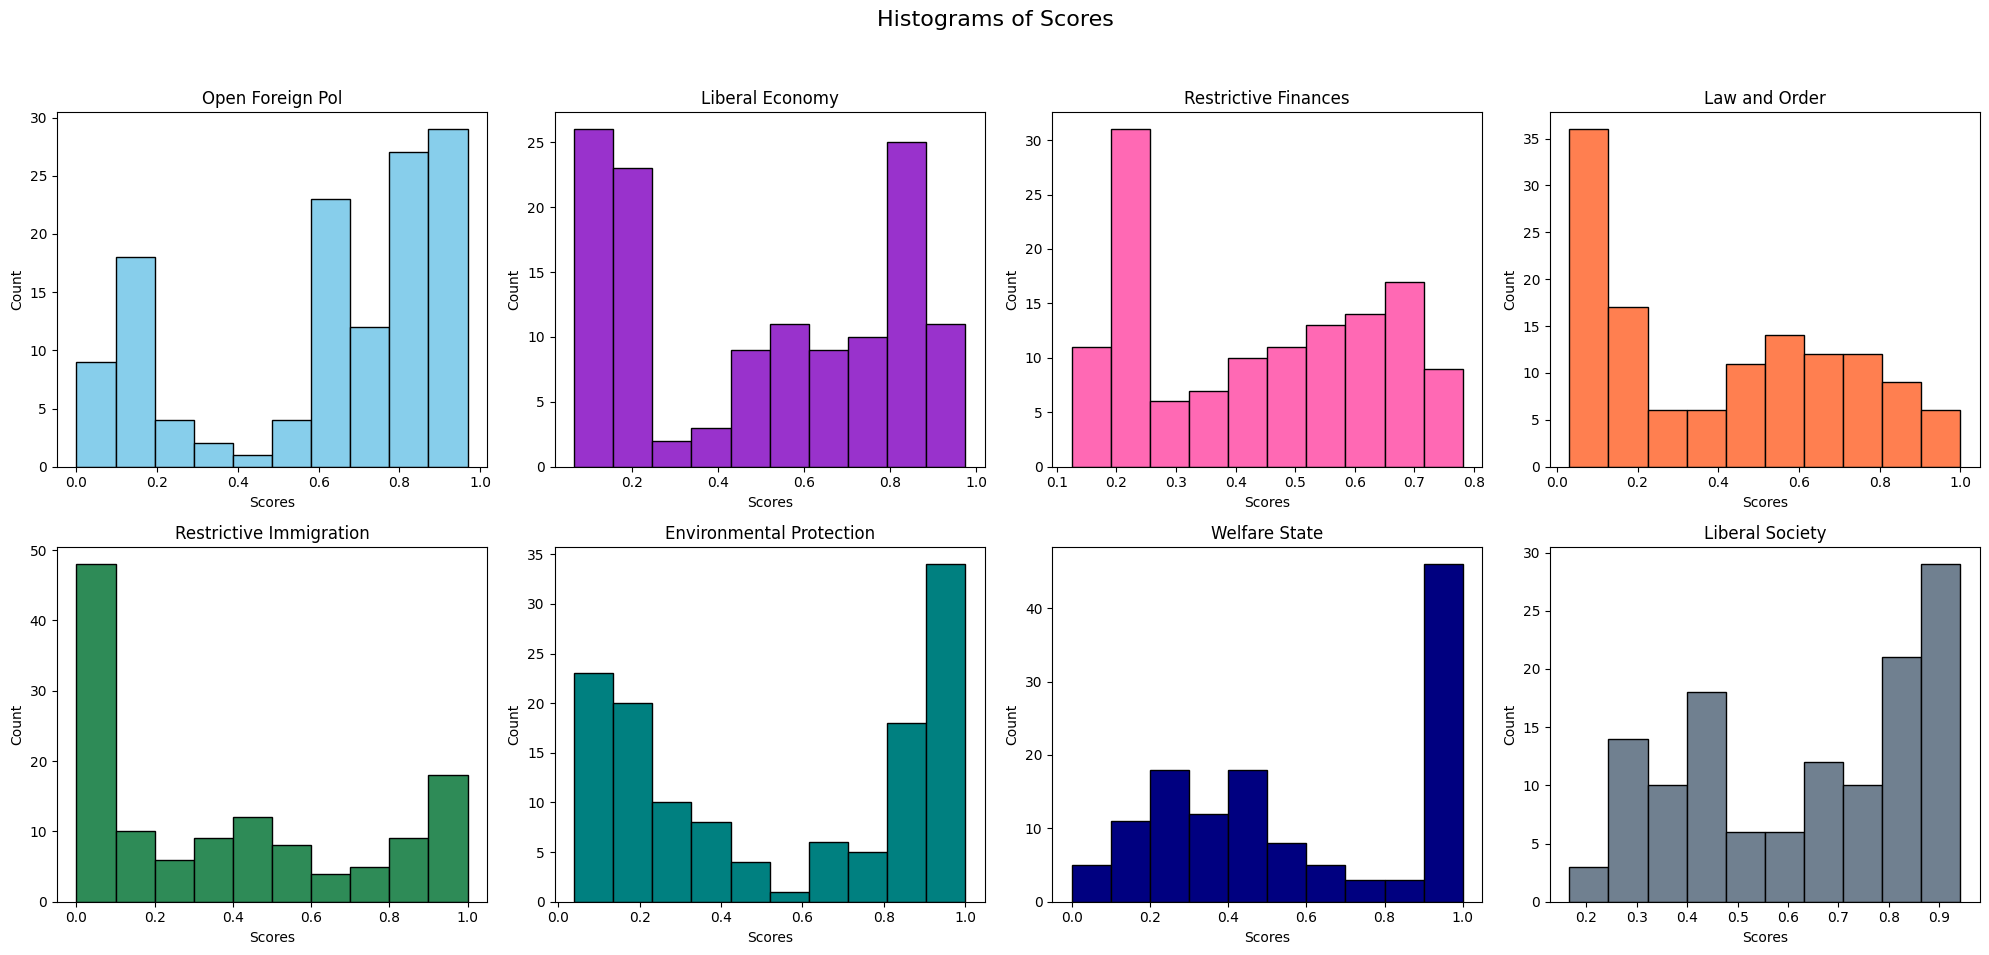

In [3]:
analysis_data = final_data.rename(columns={"cleavage_1": "Open Foreign Pol", "cleavage_2": "Liberal Economy", "cleavage_3": "Restrictive Finances", "cleavage_4": "Law and Order", "cleavage_5": "Restrictive Immigration", "cleavage_6": "Environmental Protection", "cleavage_7": "Welfare State", "cleavage_8": "Liberal Society"})
analysis_data = analysis_data[['Open Foreign Pol', 'Liberal Economy', 'Restrictive Finances', 'Law and Order', 'Restrictive Immigration', 'Environmental Protection', 'Welfare State', 'Liberal Society']]

fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))
fig.suptitle('Histograms of Scores', fontsize=16)

colors = ['skyblue', 'darkorchid', 'hotpink', 'coral', 'seagreen', 'teal', 'navy', 'slategrey']

i = 0
for ax, (column_name, scores) in zip(axes.flatten(), analysis_data.items()):
    ax.hist(scores.dropna(), bins=10, color=colors[i], edgecolor='black')
    ax.set_title(column_name)
    ax.set_xlabel('Scores')
    ax.set_ylabel('Count')
    i += 1

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
# plt.savefig('scores_histograms.png', format='png', dpi=300) # uncomment if you would like to save the plot

Text(0.5, 1.0, 'Heatmap of Score Correlations')

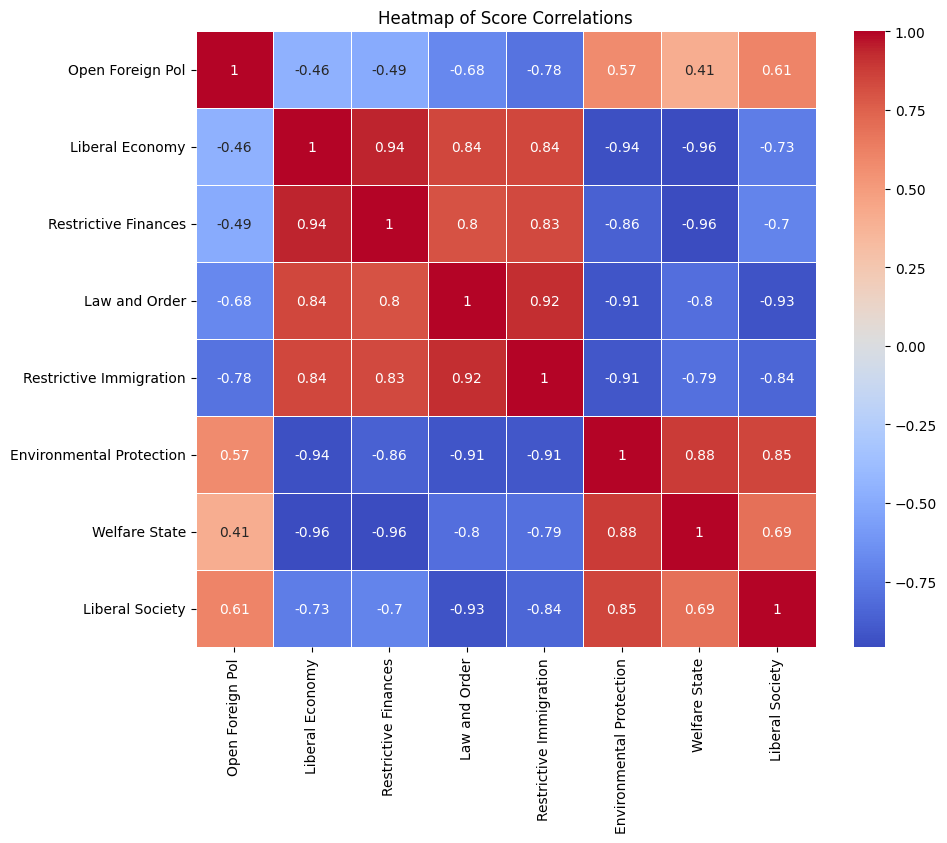

In [4]:
analysis_data = final_data.rename(columns={"cleavage_1": "Open Foreign Pol", "cleavage_2": "Liberal Economy", "cleavage_3": "Restrictive Finances", "cleavage_4": "Law and Order", "cleavage_5": "Restrictive Immigration", "cleavage_6": "Environmental Protection", "cleavage_7": "Welfare State", "cleavage_8": "Liberal Society"})
corr_matrix = analysis_data[['Open Foreign Pol', 'Liberal Economy', 'Restrictive Finances', 'Law and Order', 'Restrictive Immigration', 'Environmental Protection', 'Welfare State', 'Liberal Society']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Heatmap of Score Correlations')
# plt.savefig('scores_heatmap.png', format='png', dpi=300, bbox_inches='tight') # uncomment if you would like to save the plot

Text(0.5, 1.03, 'Political Representations of Parlimentarians in 2D')

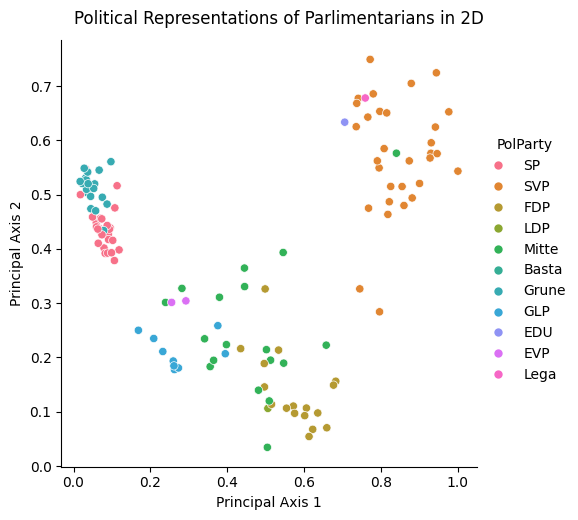

In [9]:
analysis_data = final_data[['smartmap_x', 'smartmap_y', 'vote_Party']]
analysis_data = analysis_data.rename(columns={'smartmap_x': 'Principal Axis 1', 'smartmap_y': 'Principal Axis 2', 'vote_Party': 'PolParty'})
figure = sns.relplot(data=analysis_data, x="Principal Axis 1", y="Principal Axis 2", hue="PolParty")
figure.fig.suptitle('Political Representations of Parlimentarians in 2D', fontsize=12, y=1.03)
# plt.savefig('scores_2d.png', format='png', dpi=300, bbox_inches='tight') # uncomment if you would like to save the plot

## Analysis of First Stage Results

Text(0, 0.5, 'Number of Draft Laws')

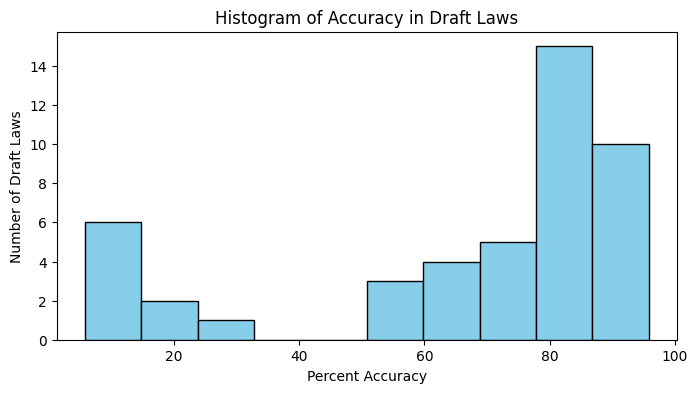

In [10]:
accuracies = [70.4, 90.83, 8.33, 30.77, 55.26, 72.03, 64.91, 82.692, 88.617, 76.271, 85.95, 85.95, 86.885, 80, 93.043, 71.186,
             81.3, 85.827, 79.675, 81.196, 82.645, 89.744, 90.91, 84.483, 66.379, 6.78, 81.896, 57.692, 86.726, 8.13, 51.376,
             77.049, 91.379, 66.667, 67.826, 23.077, 94.068, 5.785, 12.698, 78.826, 20.8, 84.297, 95.833, 90.654, 80.488, 11.711]

plt.figure(figsize=(8, 4))
plt.hist(accuracies, bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Accuracy in Draft Laws')
plt.xlabel('Percent Accuracy')
plt.ylabel('Number of Draft Laws')
# plt.savefig('accuracies.png', format='png', dpi=300, bbox_inches='tight') # uncomment if you would like to save the plot

Text(0, 0.5, 'Accuracy')

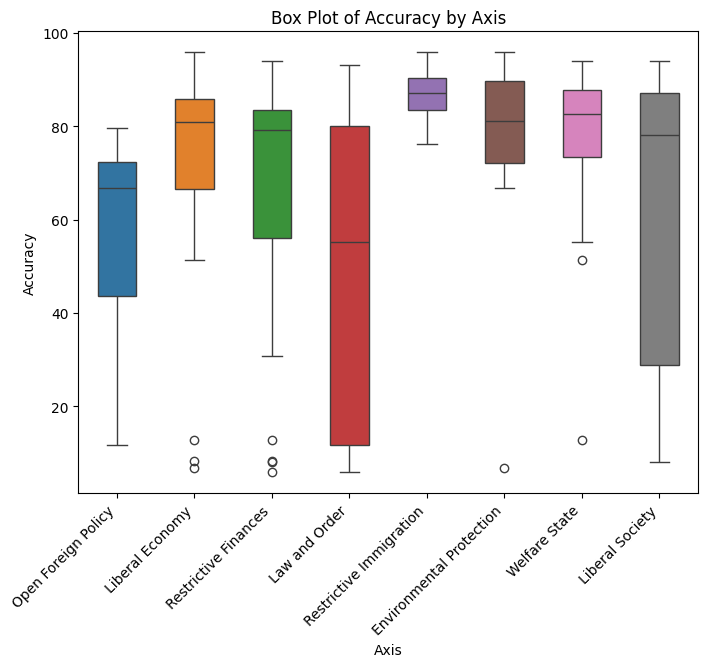

In [13]:
cleavage_accuracies = {
    'Open Foreign Policy': [79.675, 66.379, 77.049, 66.667, 67.826, 20.8, 11.711],
    'Liberal Economy': [8.33, 72.03, 85.95, 85.95, 86.885, 80, 93.043, 71.186, 81.3, 81.196, 82.645, 89.744, 84.483, 66.379, 6.78, 57.692, 86.726, 51.376, 66.667, 67.826, 12.698, 84.297, 95.833, 80.488], 
    'Restrictive Finances': [70.4, 8.33, 30.77, 82.692, 85.95, 85.95, 93.043, 71.186, 81.3, 79.675, 81.196, 82.645, 90.91, 57.692, 86.726, 8.13, 51.376, 77.049, 67.826, 94.068, 5.785, 12.698, 78.862, 80.488],
    'Law and Order': [8.33, 30.77, 55.26, 64.91, 86.885, 80, 93.043, 79.675, 84.483, 6.78, 81.896, 8.13, 77.049, 23.077, 5.785, 20.8, 11.711],
    'Restrictive Immigration': [88.617, 76.271, 85.827, 95.833],
    'Environmental Protection': [72.03, 81.196, 82.645, 89.744, 6.78, 91.379, 66.667, 78.862, 95.833],
    'Welfare State': [70.4, 90.83, 55.26, 82.692, 88.617, 76.271, 85.95, 86.885, 81.3, 90.91, 84.483, 81.896, 57.692, 86.726, 51.376, 94.068, 12.698, 90.654, 80.488],
    'Liberal Society': [70.4, 90.83, 30.77, 64.91, 88.617, 76.271, 80, 85.827, 81.896, 86.726, 8.13, 23.077, 94.068, 20.8, 90.654, 11.711]
}

axis = []
accuracy = []

for key, values in cleavage_accuracies.items():
    axis.extend([key] * len(values))
    accuracy.extend(values)

cleavage_accuracies = pd.DataFrame({
    'axis': axis,
    'accuracy': accuracy
})

plt.figure(figsize=(8, 6))
sns.boxplot(x=cleavage_accuracies["axis"], y=cleavage_accuracies["accuracy"], hue=cleavage_accuracies["axis"], palette="tab10", width=0.5, legend=False)
plt.xticks(rotation=45, ha='right')

plt.title('Box Plot of Accuracy by Axis')
plt.suptitle('')
plt.xlabel('Axis')
plt.ylabel('Accuracy')

# plt.savefig('cleavage_accuracies.png', format='png', dpi=300, bbox_inches='tight') # uncomment if you would like to save the plot

Text(0, 0.5, 'Accuracy')

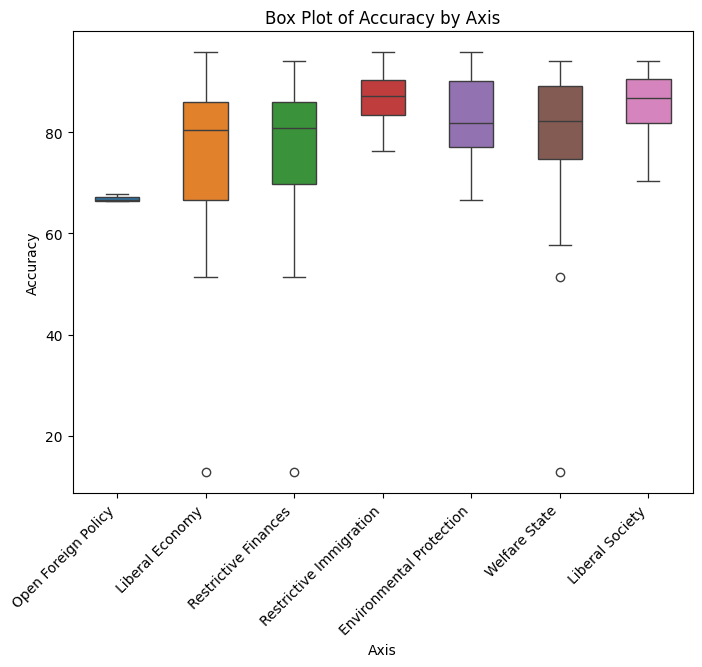

In [14]:
cleavage_accuracies_no_lao = {
    'Open Foreign Policy': [66.379, 66.667, 67.826],
    'Liberal Economy': [72.03, 85.95, 85.95, 71.186, 81.3, 82.645, 89.744, 66.379, 57.692, 86.726, 51.376, 66.667, 67.826, 12.698, 84.297, 95.833, 80.488], 
    'Restrictive Finances': [70.4, 82.692, 85.95, 85.95, 71.186, 81.3, 82.645, 90.91, 57.692, 86.726, 51.376, 67.826, 94.068, 12.698, 78.862, 80.488],
    'Restrictive Immigration': [88.617, 76.271, 85.827, 95.833],
    'Environmental Protection': [72.03, 81.196, 82.645, 89.744, 91.379, 66.667, 78.862, 95.833],
    'Welfare State': [70.4, 90.83, 82.692, 88.617, 76.271, 85.95, 81.3, 90.91, 81.896, 57.692, 86.726, 51.376, 94.068, 12.698, 90.654, 80.488],
    'Liberal Society': [70.4, 90.83, 88.617, 76.271, 85.827, 81.896, 86.726, 94.068, 90.654]
}

axis = []
accuracy = []

for key, values in cleavage_accuracies_no_lao.items():
    axis.extend([key] * len(values))
    accuracy.extend(values)

cleavage_accuracies_no_lao = pd.DataFrame({
    'axis': axis,
    'accuracy': accuracy
})

plt.figure(figsize=(8, 6))
sns.boxplot(x=cleavage_accuracies_no_lao["axis"], y=cleavage_accuracies_no_lao["accuracy"], hue=cleavage_accuracies_no_lao["axis"], palette="tab10", legend=False, width=0.5)
plt.xticks(rotation=45, ha='right')

plt.title('Box Plot of Accuracy by Axis')
plt.suptitle('')
plt.xlabel('Axis')
plt.ylabel('Accuracy')

# plt.savefig('cleavage_accuracies_no_lao.png', format='png', dpi=300, bbox_inches='tight') # uncomment if you would like to save the plot

Text(0, 0.5, 'Accuracy')

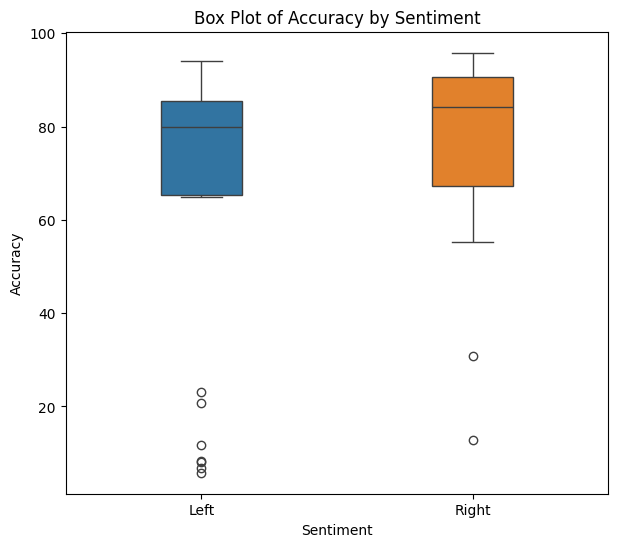

In [15]:
left_right_acc = {
   'Left': [70.4, 90.83, 8.33, 72.03, 64.91, 82.692, 88.617, 76.271, 85.95, 86.885, 80, 81.3, 85.827, 79.675, 84.483, 66.379, 6.78, 81.896, 86.726, 8.13, 77.049, 91.379, 67.826, 23.077, 94.068, 5.785, 20.8, 84.297, 80.488, 11.711], 
    'Right': [30.77, 55.26, 85.95, 93.043, 71.186, 81.196, 82.645, 89.744, 90.91, 12.698, 95.833, 90.654]
}

sentiment = []
accuracy = []

for key, values in left_right_acc.items():
    sentiment.extend([key] * len(values))
    accuracy.extend(values)

left_right_acc = pd.DataFrame({
    'sentiment': sentiment,
    'accuracy': accuracy
})

plt.figure(figsize=(7, 6))
sns.boxplot(x=left_right_acc["sentiment"], y=left_right_acc["accuracy"], hue=left_right_acc["sentiment"], palette="tab10", legend=False, width=0.3)

plt.title('Box Plot of Accuracy by Sentiment')
plt.suptitle('')
plt.xlabel('Sentiment')
plt.ylabel('Accuracy')

# plt.savefig('left_right_accuracies.png', format='png', dpi=300, bbox_inches='tight') # uncomment if you would like to save the plot

Text(0, 0.5, 'Y Coordinate')

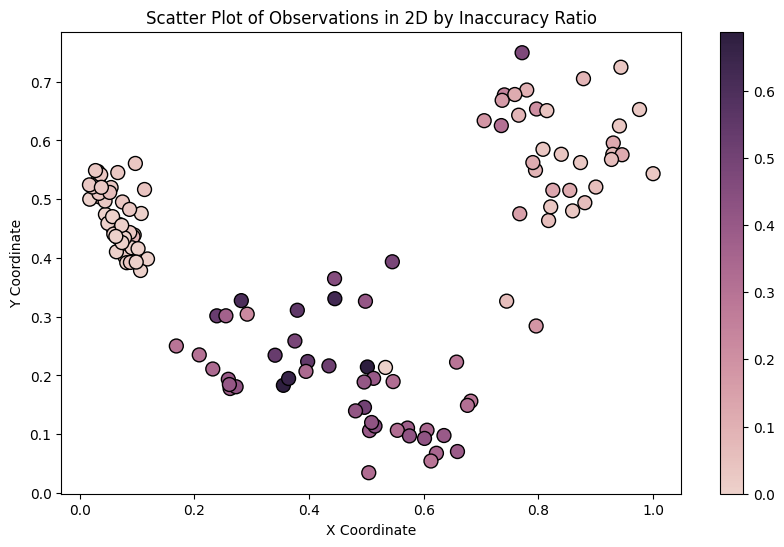

In [22]:
cmap = sns.cubehelix_palette(as_cmap=True)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    final_data['smartmap_x'],
    final_data['smartmap_y'],
    c=final_data['agent_inaccurate_ratio'],
    cmap=cmap,
    s=100,
    edgecolor='black'
)
plt.colorbar(scatter)
plt.title('Scatter Plot of Observations in 2D by Inaccuracy Ratio')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# plt.savefig('inaccuracy_2d.png', format='png', dpi=300) # uncomment if you would like to save the plot

Text(0, 0.5, 'Inaccurate Recommendation Ratio')

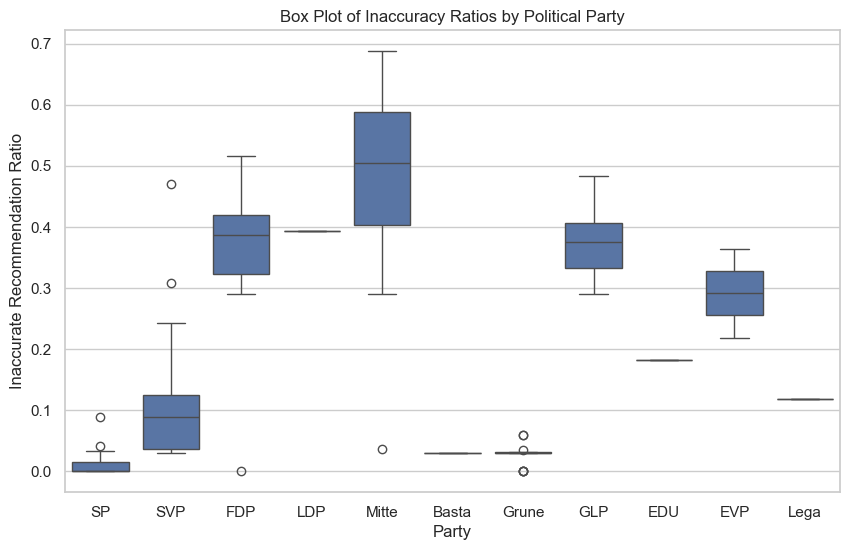

In [24]:
sns.set(style="whitegrid")

plt.figure(figsize=(10, 6))
ax = sns.boxplot(x='vote_Party', y='agent_inaccurate_ratio', data=final_data)
ax.set_title('Box Plot of Inaccuracy Ratios by Political Party')
ax.set_xlabel('Party')
ax.set_ylabel('Inaccurate Recommendation Ratio')

# plt.savefig('inaccuracy_party.png', format='png', dpi=300) # uncomment if you would like to save the plot

C:\Users\niluf\AppData\Local\Temp\ipykernel_21256\4004663958.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index.map(meaning_dict), rotation=90)
C:\Users\niluf\AppData\Local\Temp\ipykernel_21256\4004663958.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index.map(meaning_dict), rotation=90)
C:\Users\niluf\AppData\Local\Temp\ipykernel_21256\4004663958.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data.index.map(meaning_dict), rotation=90)


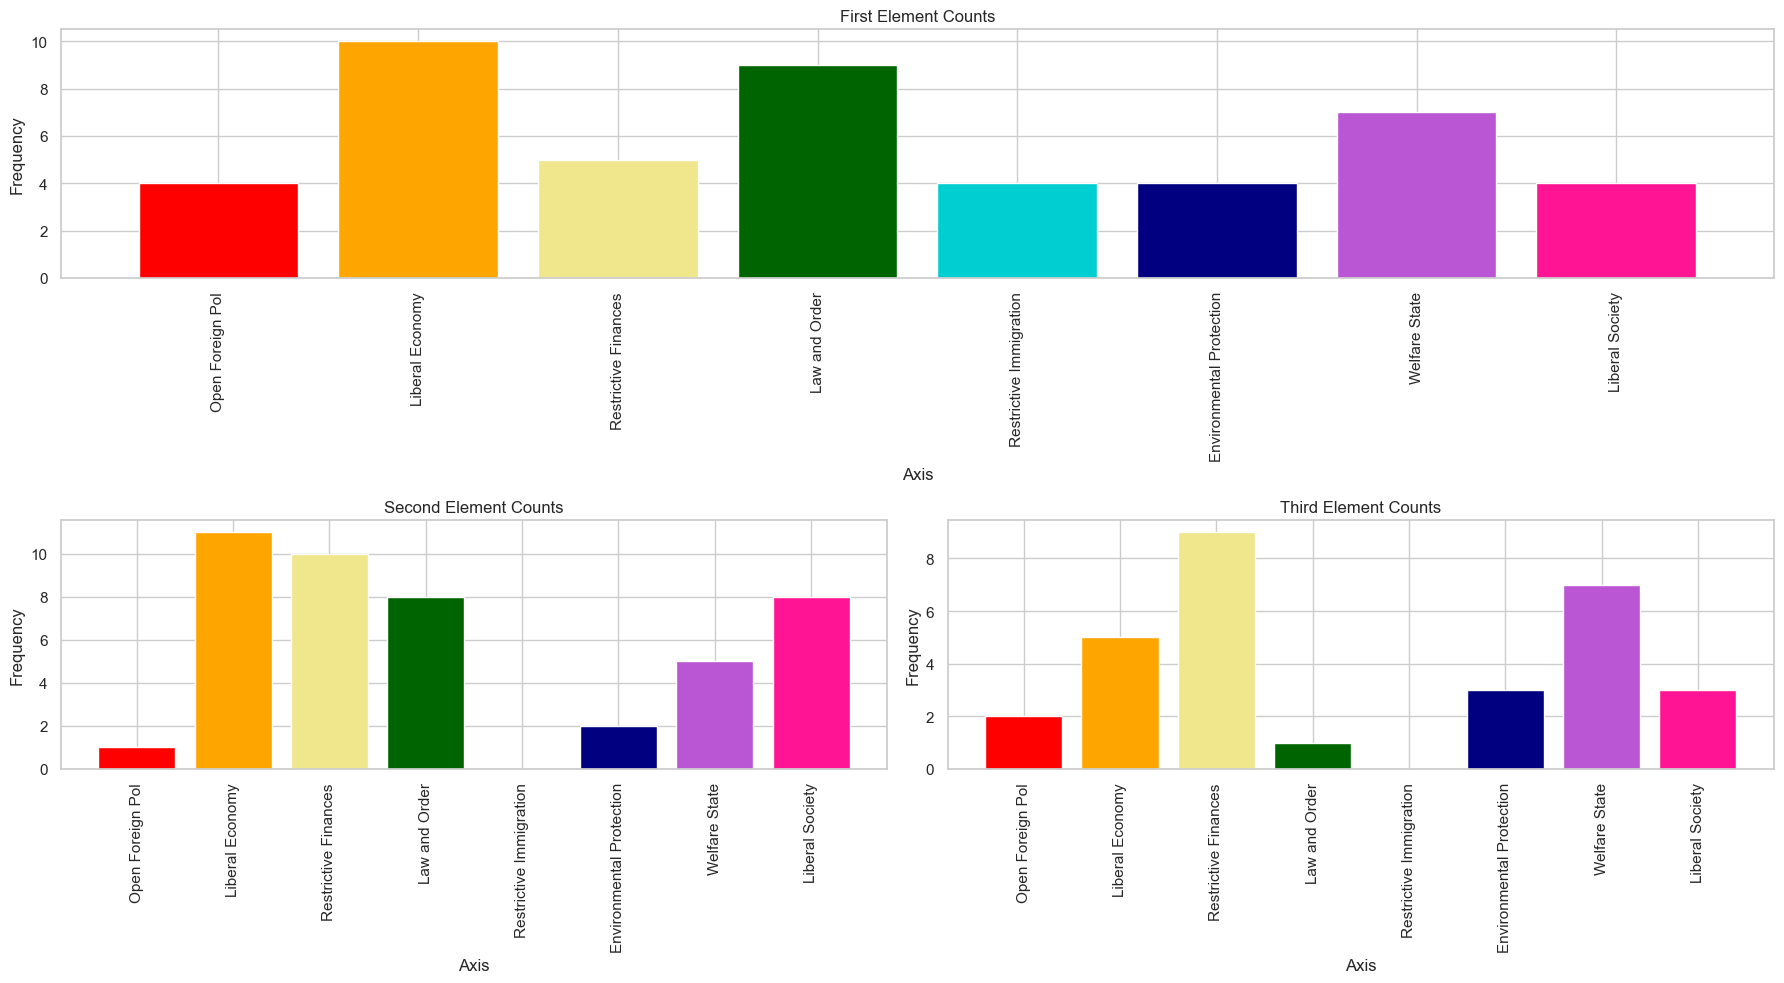

In [27]:
color_map = {
    1: 'red',
    2: 'orange',
    3: 'khaki',
    4: 'darkgreen',
    5: 'darkturquoise',
    6: 'navy',
    7: 'mediumorchid',
    8: 'deeppink'
}

def plot_histogram(data, title, ax):
    bars = ax.bar(data.index.map(meaning_dict), data.values, 
                  color=[color_map[x] for x in data.index])
    ax.set_title(title)
    ax.set_xlabel('Axis')
    ax.set_ylabel('Frequency')
    ax.set_xticklabels(data.index.map(meaning_dict), rotation=90)

fig = plt.figure(figsize=(18, 10))

ax1 = plt.subplot2grid((2, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((2, 2), (1, 0))
ax3 = plt.subplot2grid((2, 2), (1, 1))

plot_histogram(first_counts, 'First Element Counts', ax1)
plot_histogram(second_counts, 'Second Element Counts', ax2)
plot_histogram(third_counts, 'Third Element Counts', ax3)

plt.tight_layout()
# plt.savefig('relecancy_histograms.png', format='png', dpi=300) # uncomment if you would like to save the plot

## Analysis of KNN Results

Text(0, 0.5, 'Number of Draft Laws')

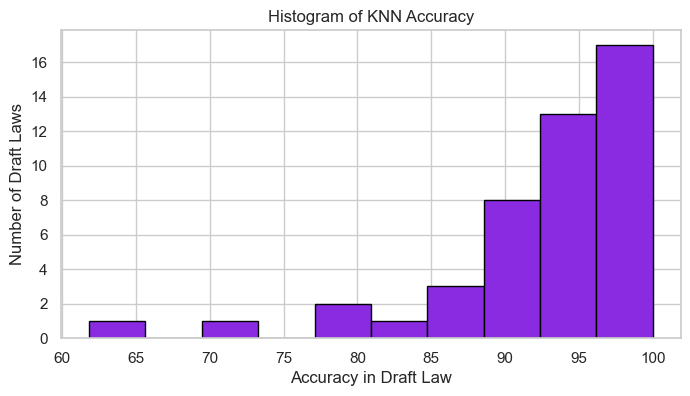

In [33]:
values = list(knn_law_accuracy.values())
values = [100*value for value in values]

plt.figure(figsize=(8, 4))
plt.hist(values, bins=10, color='blueviolet', edgecolor='black')
plt.title('Histogram of KNN Accuracy')
plt.xlabel('Accuracy in Draft Law')
plt.ylabel('Number of Draft Laws')
# plt.savefig('knn_acc_hist.png', format='png', dpi=300) # uncomment if you would like to save the plot

## Analysis of Second Stage Results

Text(0, 0.5, 'Number of Draft Laws')

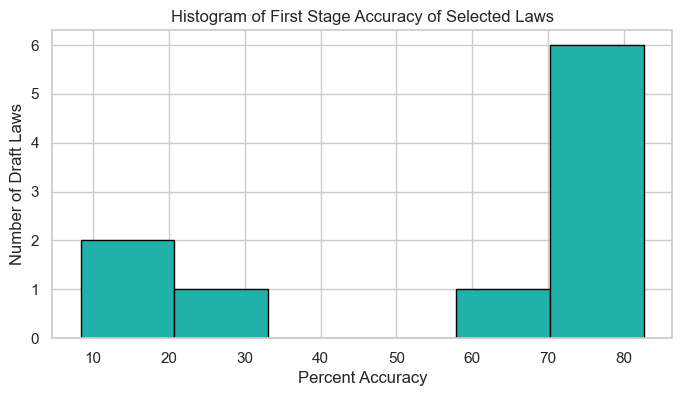

In [35]:
values = list(first_time_accuracy.values())

plt.figure(figsize=(8, 4))
plt.hist(values, bins=6, color='lightseagreen', edgecolor='black')
plt.title('Histogram of First Stage Accuracy of Selected Laws')
plt.xlabel('Percent Accuracy')
plt.ylabel('Number of Draft Laws')
# plt.savefig('selected_laws_hist.png', format='png', dpi=300) # uncomment if you would like to save the plot

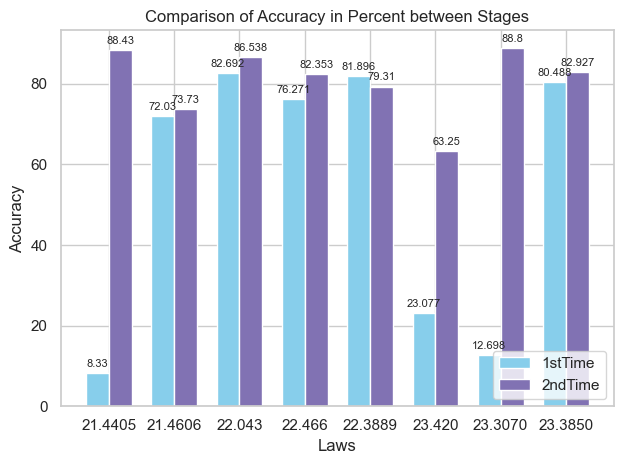

In [37]:
changes_second_time = pd.DataFrame({
    'Law': list(second_time_accuracy.keys()),
    'First Stage Accuracy': [first_time_accuracy[key] for key in second_time_accuracy.keys()],
    'Second Stage Accuracy': [second_time_accuracy[key] for key in second_time_accuracy.keys()]
})

positions = np.arange(len(changes_second_time['Law']))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(positions - width/2, changes_second_time['First Stage Accuracy'], width, label='1stTime', color='skyblue')
rects2 = ax.bar(positions + width/2, changes_second_time['Second Stage Accuracy'], width, label='2ndTime', color='m')

ax.set_xlabel('Laws')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of Accuracy in Percent between Stages')
ax.set_xticks(positions)
ax.set_xticklabels(changes_second_time['Law'])
ax.legend(loc='lower right')

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=8)

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
# plt.savefig('change_accuracy.png', format='png', dpi=300) # uncomment if you would like to save the plot

## Ground Truth Decision Boundary

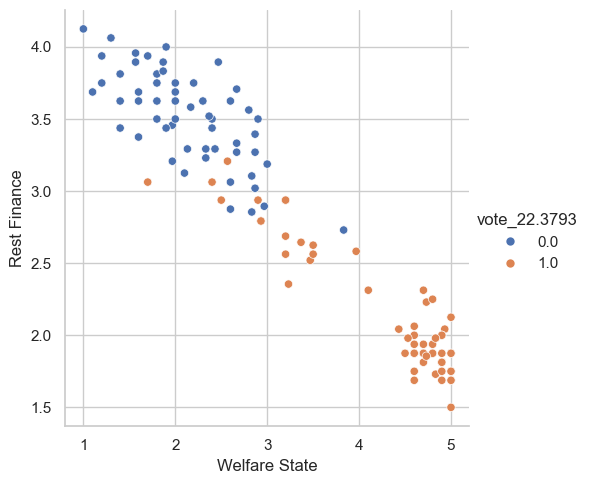

In [51]:
vote = '22.3793'
vote_name = 'vote_' + vote
inacc = agent_inaccurates[vote]

most_rel = 'cleavage_' + str(relevances[vote][0])
second_rel = 'cleavage_' + str(relevances[vote][1])

cleavage_translation = {'cleavage_1': 'Open Foreign Pol', 'cleavage_2': 'Liberal Econ', 'cleavage_3': 'Rest Finance', 'cleavage_4': 'Law and Order',
                        'cleavage_5': 'Rest Immigration', 'cleavage_6': 'Env Protection', 'cleavage_7': 'Welfare State', 'cleavage_8': 'Liberal Soc'}

analysis_data = final_data.copy()
analysis_data[vote_name] = analysis_data[vote_name].map(dict({'Yes':1, 'No':0}))

analysis_data = analysis_data[[most_rel, second_rel, vote_name, "full_name"]].dropna()
analysis_data = analysis_data.loc[~(analysis_data['full_name'].isin(names_not_prompted[vote]))]
analysis_data[most_rel] = 4 * analysis_data[most_rel] + 1
analysis_data[second_rel] = 4 * analysis_data[second_rel] + 1

most_rel_name = cleavage_translation[most_rel]
second_rel_name = cleavage_translation[second_rel]
analysis_data = analysis_data.rename(columns={most_rel: most_rel_name, second_rel: second_rel_name})

sns.relplot(data=analysis_data, x=most_rel_name, y=second_rel_name, hue=vote_name)

## Agent's Decision Boundary

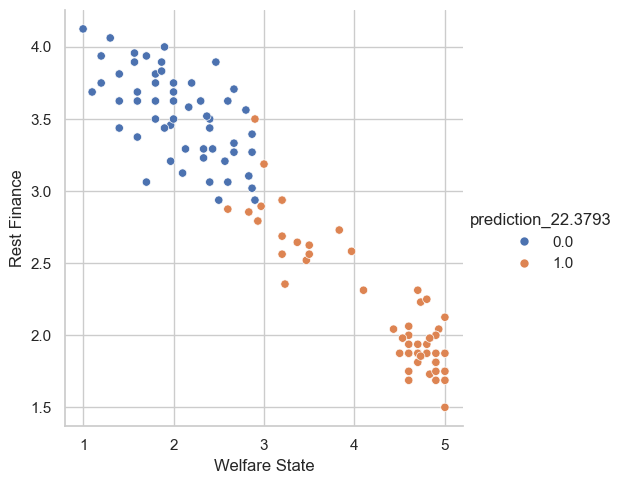

In [52]:
vote = '22.3793'
vote_name = 'vote_' + vote
prediction_name = 'prediction_' + vote
inacc = agent_inaccurates[vote]

most_rel = 'cleavage_' + str(relevances[vote][0])
second_rel = 'cleavage_' + str(relevances[vote][1])

cleavage_translation = {'cleavage_1': 'Open Foreign Pol', 'cleavage_2': 'Liberal Econ', 'cleavage_3': 'Rest Finance', 'cleavage_4': 'Law and Order',
                        'cleavage_5': 'Rest Immigration', 'cleavage_6': 'Env Protection', 'cleavage_7': 'Welfare State', 'cleavage_8': 'Liberal Soc'}

analysis_data = final_data.copy()
analysis_data[vote_name] = analysis_data[vote_name].map(dict({'Yes':1, 'No':0}))
analysis_data[prediction_name] = analysis_data[vote_name]

analysis_data = analysis_data[[most_rel, second_rel, prediction_name, "full_name"]].dropna()
analysis_data = analysis_data.loc[~(analysis_data['full_name'].isin(names_not_prompted[vote]))]
analysis_data.loc[(analysis_data['full_name'].isin(inacc)), prediction_name] = 1 - analysis_data.loc[(analysis_data['full_name'].isin(inacc)), prediction_name]

analysis_data[most_rel] = 4 * analysis_data[most_rel] + 1
analysis_data[second_rel] = 4 * analysis_data[second_rel] + 1

most_rel_name = cleavage_translation[most_rel]
second_rel_name = cleavage_translation[second_rel]
analysis_data = analysis_data.rename(columns={most_rel: most_rel_name, second_rel: second_rel_name})

sns.relplot(data=analysis_data, x=most_rel_name, y=second_rel_name, hue=prediction_name)

#.savefig('boundary_long_positive_22_3793.png')

## KNN Decision Boundary

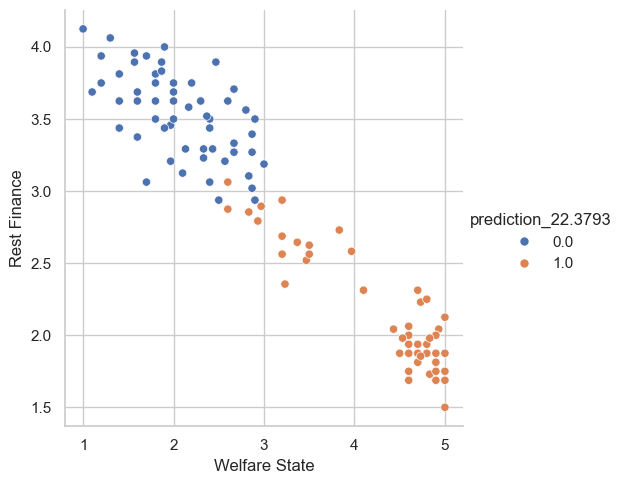

In [53]:
vote = '22.3793'
vote_name = 'vote_' + vote
prediction_name = 'prediction_' + vote
inacc = knn_inaccurates[vote]

most_rel = 'cleavage_' + str(relevances[vote][0])
second_rel = 'cleavage_' + str(relevances[vote][1])

cleavage_translation = {'cleavage_1': 'Open Foreign Pol', 'cleavage_2': 'Liberal Econ', 'cleavage_3': 'Rest Finance', 'cleavage_4': 'Law and Order',
                        'cleavage_5': 'Rest Immigration', 'cleavage_6': 'Env Protection', 'cleavage_7': 'Welfare State', 'cleavage_8': 'Liberal Soc'}

analysis_data = final_data.copy()
analysis_data[vote_name] = analysis_data[vote_name].map(dict({'Yes':1, 'No':0}))
analysis_data[prediction_name] = analysis_data[vote_name]

analysis_data = analysis_data[[most_rel, second_rel, prediction_name, "full_name"]].dropna()
analysis_data = analysis_data.loc[~(analysis_data['full_name'].isin(names_not_prompted[vote]))]
analysis_data.loc[(analysis_data['full_name'].isin(inacc)), prediction_name] = 1 - analysis_data.loc[(analysis_data['full_name'].isin(inacc)), prediction_name]

analysis_data[most_rel] = 4 * analysis_data[most_rel] + 1
analysis_data[second_rel] = 4 * analysis_data[second_rel] + 1

most_rel_name = cleavage_translation[most_rel]
second_rel_name = cleavage_translation[second_rel]
analysis_data = analysis_data.rename(columns={most_rel: most_rel_name, second_rel: second_rel_name})

sns.relplot(data=analysis_data, x=most_rel_name, y=second_rel_name, hue=prediction_name)

#.savefig('boundary_long_positive_22_3793.png')